In [1]:
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2

Using TensorFlow backend.


In [2]:
path = '/Sign_Language_Recognition/preprocessed_new/'

In [3]:
gestures = os.listdir(path)

In [4]:
dict_labels = {
    'A': 1,
    'B': 2,
    'C':3,
    'D':4,
    'E':5,
    'F':6,
    'G':7,
    'H':8,
    'I':9,
    'K':10,
    'L':11,
    'M':12,
    'N':13,
    'O':14,
    'P':15,
    'Q':16,
    'R':17,
    'S':18,
    'T':19,
    'U':20,
    'V':21,
    'W':22,
    'X':23,
    'Y':24,
    
}

In [5]:
print(list(dict_labels.keys()))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


In [6]:
x, y = [], []
for ix in gestures:
    images = os.listdir(path + ix)
    for cx in images:
        img_path = path + ix + '/' + cx
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

In [7]:
X = np.array(x)
Y = np.array(y)
Y = np_utils.to_categorical(Y)
Y.shape

(28800, 25)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

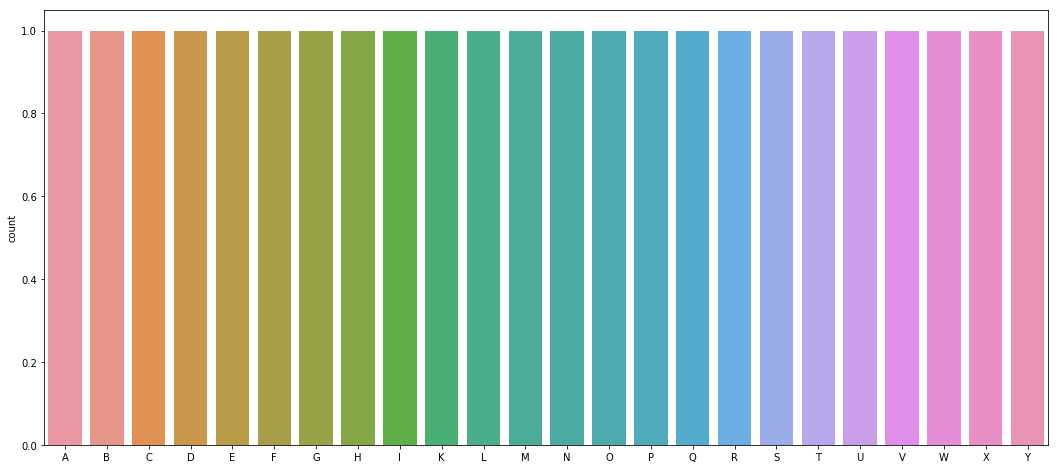

In [30]:
plt.figure(figsize = (18,8))
sns.countplot(x=list(dict_labels.keys()))

In [33]:
Y.shape

(28800, 25)

In [34]:
categories = Y.shape[1]

In [35]:
X, Y = shuffle(X, Y, random_state=0)

In [36]:
X.shape

(28800, 50, 50, 1)

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [96]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(20160, 50, 50, 1) (8640, 50, 50, 1)
(20160, 25) (8640, 25)


In [97]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(categories, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
__________

In [98]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [99]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=[X_test, Y_test])

Train on 20160 samples, validate on 8640 samples
Epoch 1/50
20160/20160 [==============================] - 28s 1ms/step - loss: 0.7853 - acc: 0.7698 - val_loss: 0.1140 - val_acc: 0.9664
Epoch 2/50
20160/20160 [==============================] - 26s 1ms/step - loss: 0.1139 - acc: 0.9658 - val_loss: 0.0481 - val_acc: 0.9873
Epoch 3/50
20160/20160 [==============================] - 27s 1ms/step - loss: 0.0671 - acc: 0.9788 - val_loss: 0.0381 - val_acc: 0.9891
Epoch 4/50
20160/20160 [==============================] - 27s 1ms/step - loss: 0.0467 - acc: 0.9854 - val_loss: 0.0245 - val_acc: 0.9936
Epoch 5/50
20160/20160 [==============================] - 27s 1ms/step - loss: 0.0292 - acc: 0.9911 - val_loss: 0.0291 - val_acc: 0.9926
Epoch 6/50
20160/20160 [==============================] - 27s 1ms/step - loss: 0.0291 - acc: 0.9910 - val_loss: 0.0155 - val_acc: 0.9953
Epoch 7/50
20160/20160 [==============================] - 27s 1ms/step - loss: 0.0248 - acc: 0.9919 - val_loss: 0.0130 - val_acc:

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

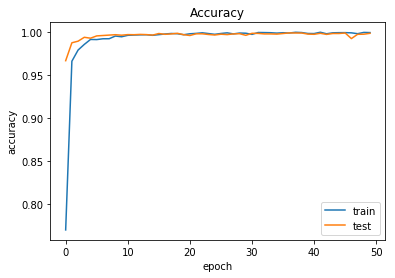

In [101]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [102]:
model.save('./new_model6.h5')

In [31]:
from keras.models import load_model


In [32]:
m = load_model('./new_model6.h5')

In [33]:
test_data = os.listdir('./test_data/')

In [34]:
x, y = [], []
for ix in test_data:
    images = os.listdir('./test_data/' + ix)
    for cx in range(1,201):
        img_path = './test_data/' + ix + '/' + str(cx) + '.jpg'
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

In [35]:
X_t = np.array(x)
y_t = np.array(y)
Y_t = np_utils.to_categorical(y_t)

In [36]:
X_t.shape

(4800, 50, 50, 1)

In [37]:
y_pred = m.predict(X_t)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(Y_t, y_pred.round())

0.7985416666666667

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_pred.round(), Y_t))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.99      1.00       202
          2       0.99      0.88      0.93       226
          3       0.91      1.00      0.95       181
          4       0.94      0.68      0.79       275
          5       1.00      0.69      0.82       290
          6       0.79      0.71      0.75       223
          7       0.61      0.46      0.52       265
          8       0.28      0.56      0.38       102
          9       0.94      0.99      0.97       191
         10       0.80      0.92      0.85       172
         11       0.83      1.00      0.91       167
         12       0.84      0.54      0.66       311
         13       0.96      0.58      0.72       333
         14       1.00      1.00      1.00       201
         15       1.00      0.90      0.95       223
         16       0.89      0.84      0.86       211
         17       0.51      0.89      0.65   

c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\asus\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
